# Lineplot with multifacets

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nuqta = sns.load_dataset("dots")
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


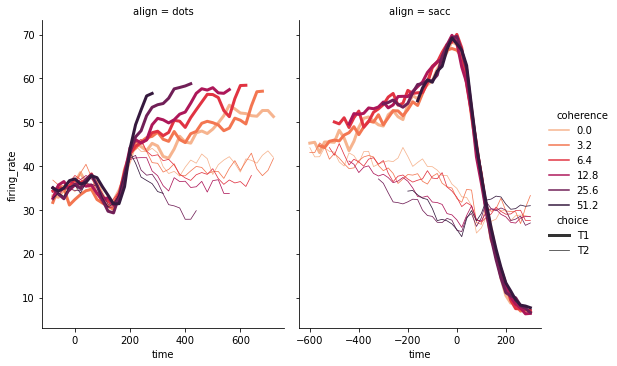

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nuqta = sns.load_dataset("dots")
# defining a color pallete
p = sns.color_palette('rocket_r')

# Plot LinePlot

sns.relplot(data=nuqta, x="time", y="firing_rate", hue="coherence",
            size="choice", col="align", kind="line", size_order=["T1","T2"],
            palette=p, height=5, aspect=.75, facet_kws=dict(sharex=False))

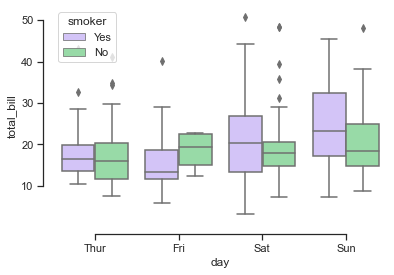

In [3]:
sns.set_theme(style="ticks", palette="pastel")

# Load the exaple tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time

sns.boxplot(x="day", y="total_bill", hue="smoker",
           palette=["m","g"], data=tips)
sns.despine(offset=10, trim=True)

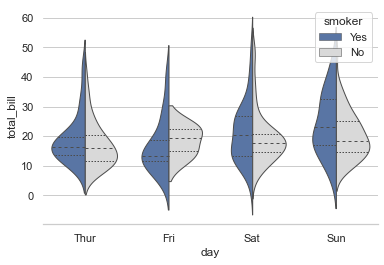

In [4]:
sns.set_theme(style="whitegrid")

#load dataset

tips=sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison

sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker", split=True, inner="quart", linewidth=1, 
              palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

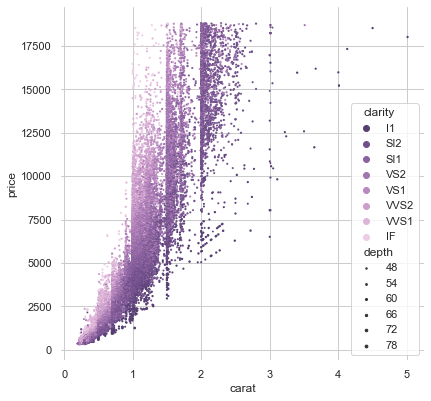

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Load the dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = (["I1","SI2","SI1","VS2","VS1","VVS2", "VVS1", "IF"])
sns.scatterplot(x="carat", y="price", hue="clarity", size="depth", palette="ch:r=.2, d=.3_r",
               hue_order=clarity_ranking, sizes=(1,8), linewidth=0, data=diamonds, ax=ax)

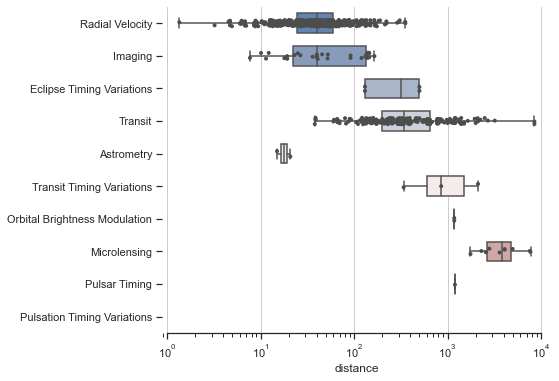

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

#initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

#load dataset
planets = sns.load_dataset("planets")

#Plot the orbital period with horizontal axes
sns.boxplot(x="distance", y="method", data=planets, 
            whis=[0, 100], width=.6, palette="vlag")

#Add inpoints to show each observation, It has only poitns/dots in a plot
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color =".3", linewidth=0)

#Tweak the visual presentation

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

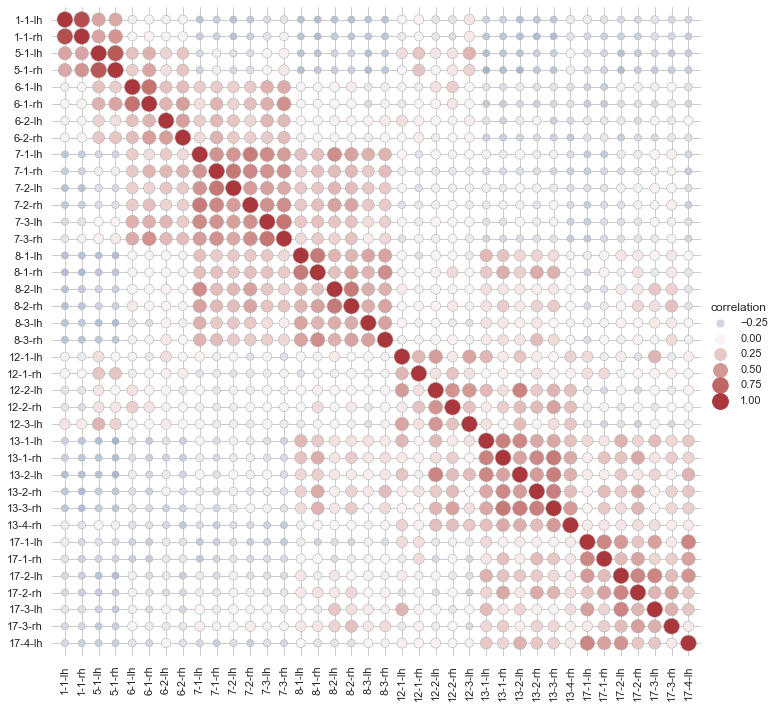

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

AttributeError: 'JointGrid' object has no attribute 'figure'

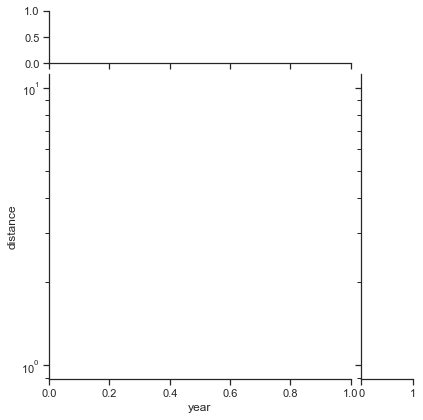

In [8]:
import seaborn as sns
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="ticks")

#Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

#Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

#Create an insert legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

#Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)

g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(
    diamonds, x="clarity", y="carat",
    color="b", order=clarity_ranking, width_method="linear",
)

C:\Users\A.S.Pride\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'carat'

<AxesSubplot:>

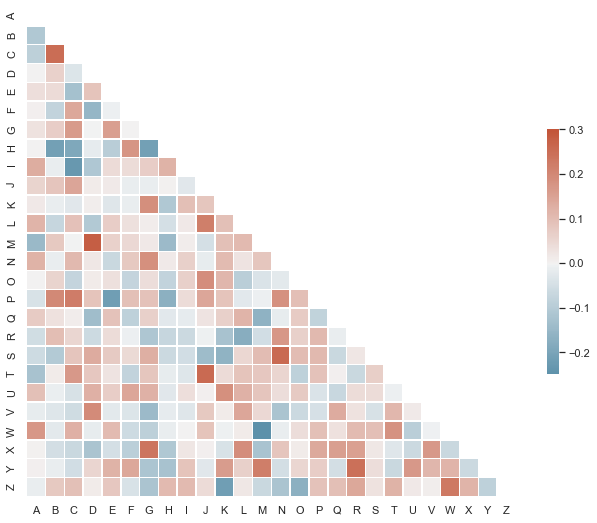

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

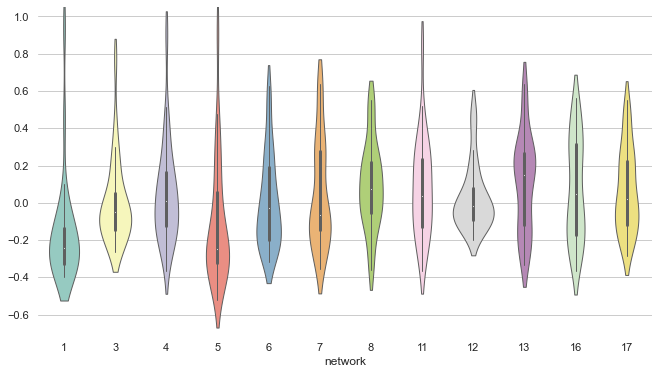

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

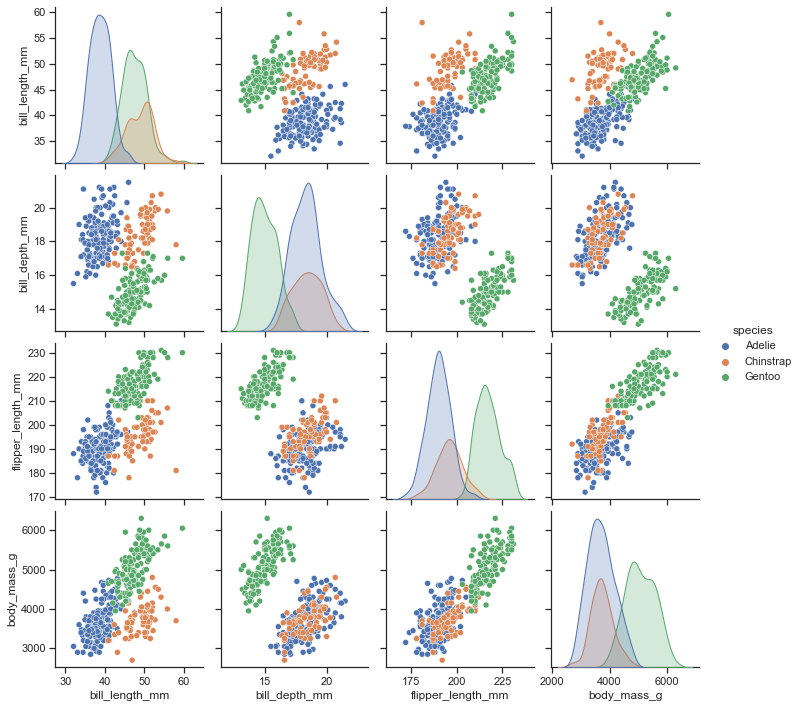

In [16]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

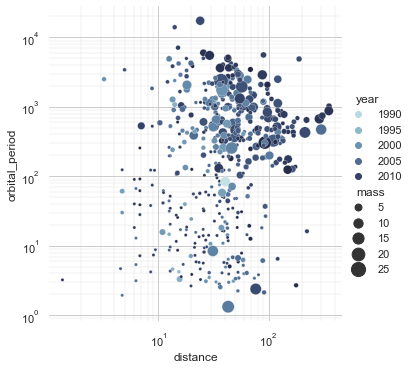

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


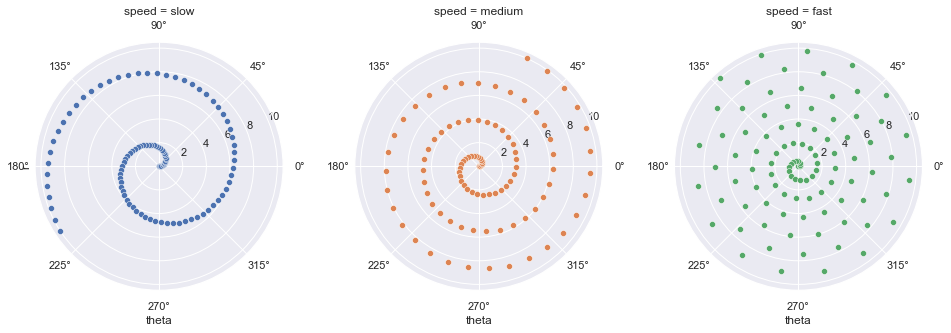

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

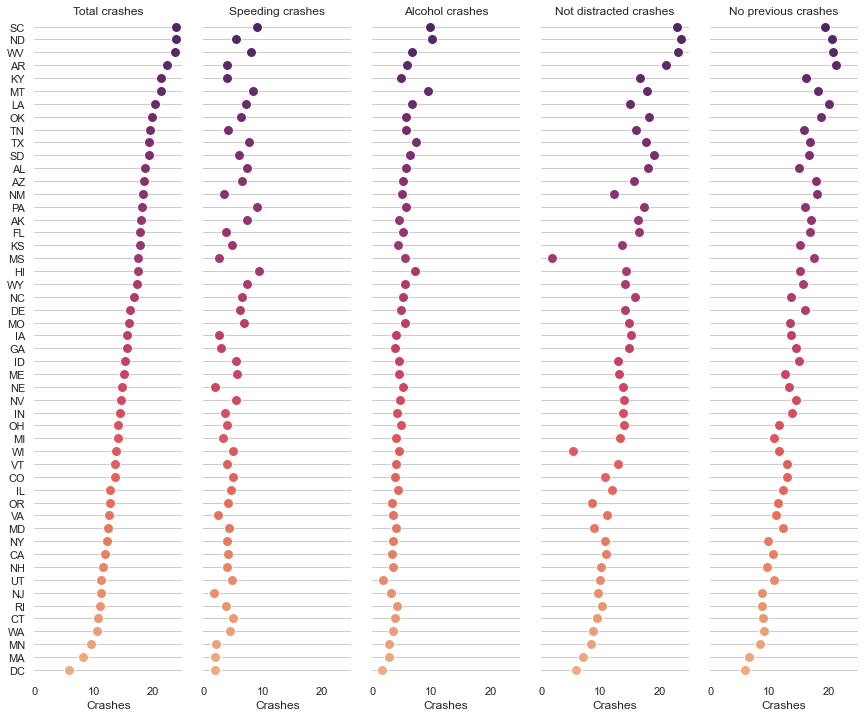

In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [21]:
import seaborn as sns
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd

nuqta = sns.load_dataset("dots")
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


<AxesSubplot:xlabel='choice', ylabel='coherence'>

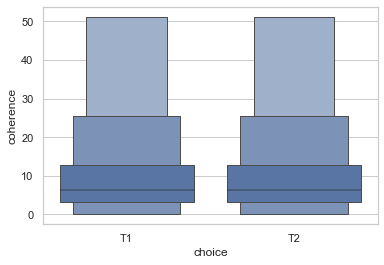

In [31]:
import seaborn as sns
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd

nuqta = sns.load_dataset("dots")

sns.set_theme(style="whitegrid")

sns.boxenplot(x="choice", y="coherence", color="b",
           scale="linear", data =nuqta)